### Constraining phloem uptake rate

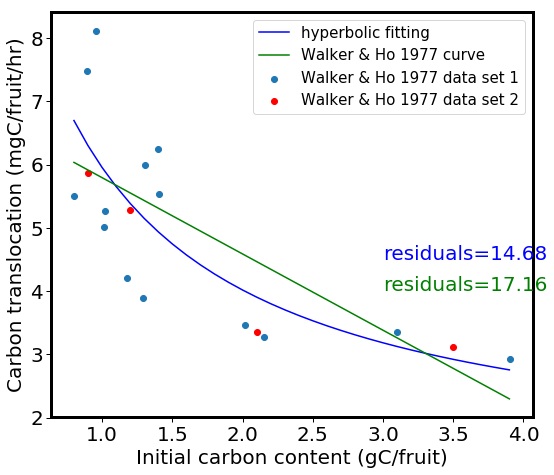

In [6]:
Cin = [0.802259887000000,0.892655367200000,0.954802259900000,1.40112994350000,1.30508474580000,1.40677966100000,1.02259887010000,1.01694915250000,1.17514124290000,1.28813559320000,2.01694915250000,2.15254237290000,3.10169491530000,3.90395480230000]
CFruit = [5.50561797750000,7.48314606740000,8.11235955060000,6.24719101120000,6,5.52808988760000,5.25842696630000,5.01123595510000,4.20224719100000,3.88764044940000,3.46067415730000,3.28089887640000,3.34831460670000,2.92134831460000]
#Cin = [0.8926553672,0.9548022599,1.0225988701,1.0169491525,1.1751412429,1.2881355932,2.0169491525,2.1525423729,3.1016949153,3.9039548023]
#CFruit = [7.4831460674,8.1123595506,5.2584269663,5.0112359551,4.202247191,3.8876404494,3.4606741573,3.2808988764,3.3483146067,2.9213483146]
#LineData
Cin_line = [0.8644067797,2.1355932203,3.5480225989]
CFruit_line = [5.9550561798,4.4269662921,2.7191011236]

Cin2 = [0.9,1.2,2.1,3.5]
CFruit2 = [5.87,5.28,3.35,3.11]

from scipy.optimize import curve_fit

def hyperbol_fitting(x,a,b,c):
    y = a+b/(x+c)
    return y

popt, pcov = curve_fit(hyperbol_fitting,Cin,CFruit)

def line_fitting(x,m,c):
    y=(m*x)+c
    return y

popt2, pcov2 = curve_fit(line_fitting,Cin_line,CFruit_line)
popt3, pcov2 = curve_fit(line_fitting,Cin,CFruit)


def hyperbol_fitting2(x,a,b,c):
    y = a+b/(x+c)
    return y

popt4, pcov4 = curve_fit(hyperbol_fitting2,Cin+Cin2,CFruit+CFruit2)

x1=list()
y1=list()
y2=list()
y3=list()
y4=list()
for i in range(8,40):
    j = float(i)/10
    x1.append(j)
    y1.append(hyperbol_fitting(j,*popt))
    y2.append(line_fitting(j,*popt2))
    y3.append(line_fitting(j,*popt3))
    y4.append(hyperbol_fitting2(j,*popt4))

error = 0
error2 = 0
error3 = 0
error4 = 0
for i in range(0,len(Cin)):
    error=error+((CFruit[i] - hyperbol_fitting(Cin[i],*popt))**2)
    error2=error2+((CFruit[i] - line_fitting(Cin[i],*popt2))**2)
    error3=error3+((CFruit[i] - line_fitting(Cin[i],*popt3))**2)
    error4=error4+((CFruit[i] - hyperbol_fitting2(Cin[i],*popt4))**2)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

plt.scatter(Cin,CFruit,label="Walker & Ho 1977 data set 1")
plt.scatter(Cin2,CFruit2,label="Walker & Ho 1977 data set 2",color="r")
plt.plot(x1,y1,label="hyperbolic fitting",color="blue")
plt.plot(x1,y2,label="Walker & Ho 1977 curve",color="green")
#plt.plot(x1,y3,label="Our line for data sets")
#plt.plot(x1,y4,label="Our curve for data sets",color="cyan")
plt.text(3,4,"residuals="+str(round(error2,2)),color="green")
plt.text(3,4.5,"residuals="+str(round(error,2)),color="blue")
#plt.text(3,5,"residuals="+str(round(error3,2)),color="red")
#plt.text(3,5,"residuals="+str(round(error4,2)),color="cyan")
plt.ylabel("Carbon translocation (mgC/fruit/hr)")
plt.xlabel("Initial carbon content (gC/fruit)")
plt.legend(fontsize="15")
plt.tight_layout()
plt.show()



        From data presented in Walker and Ho 1977 Table 1, we see that Carbon content of a fruit is directly proportional to Fruit volume

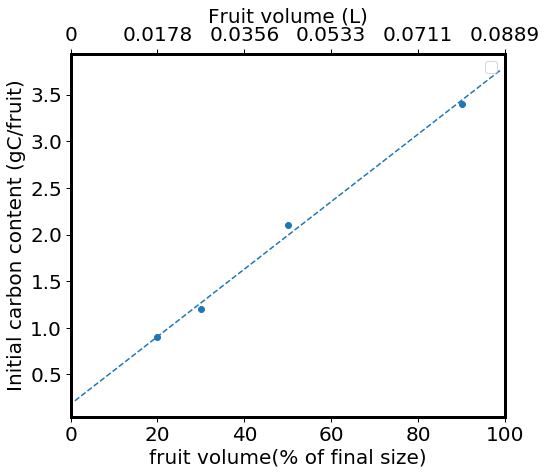

In [17]:
from scipy.optimize import curve_fit


Vol_perc = [20,30,50,90]
C_cont = [0.9,1.2,2.1,3.4]

def volume_Ccont_fitting(x,m,c):
    y=(m*x)+c
    return y

def estimateVpericarp(T,hollow=False):
    #assuming sphere
    Vpericarp = (0.0000889527 +((0.000003593996 - 0.0000889527)/(1 +((T/28.56023)**9.692893)))) # units = m3
    #
    #assuming hollowsphere - 20%
    if hollow:
        Vpericarp = (0.0000007121165 +((0.00000002819613 - 7.121165e-7)/(1 +((T/28.55635)**9.567273)))) # units = m3
    return Vpericarp


def DPA_V_curve(x):
    a = 0.0000889527
    b = 0.000003593996
    c = 0.0000889527
    d = 28.56023
    e = 9.692893
    y = (a +((b - c)/(1 +((x/d)**e)))) # units = m3
    return y

popt5,pcov5 = curve_fit(volume_Ccont_fitting,Vol_perc,C_cont)

xlist=list()
ylist=list()
for i in range(1,100):
    xlist.append(i)
    ylist.append(volume_Ccont_fitting(i,*popt5))

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

ax1 = plt.subplot(1,1,1)
ax1.scatter(Vol_perc,C_cont,label="Walker & Ho 1977 data")
ax1.plot(xlist,ylist,"--",label="fitted line")
ax1.set_xlabel("fruit volume(% of final size)")
ax1.set_ylabel("Initial carbon content (gC/fruit)")
ax1.set_xlim(0,100)

ax2 = ax1.twiny()
ax2.set_xlabel("Fruit volume (L)")
ax2.set_xticks([0,20, 40, 60, 80, 100])
ax2.set_xticklabels([0,round(0.2*estimateVpericarp(59)*(10**3),4),round(0.4*estimateVpericarp(59)*(10**3),4),round(0.6*estimateVpericarp(59)*(10**3),4),round(0.8*estimateVpericarp(59)*(10**3),4),round(estimateVpericarp(59)*(10**3),4)])

plt.legend(fontsize="15",loc="best")
plt.tight_layout()
plt.show()


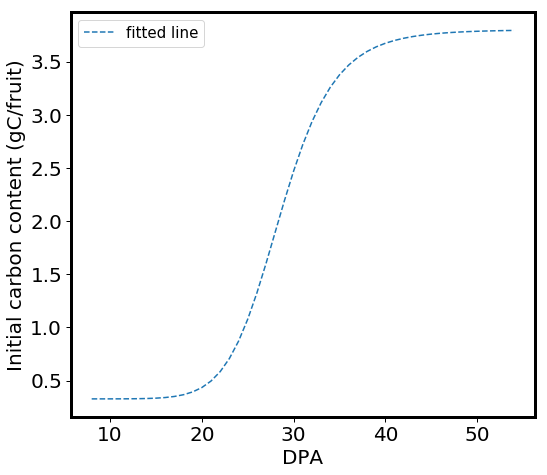

In [15]:
def Avolume_Ccont_fitting(x,m,c):
    y=(m*estimateVpericarp(x,hollow=False)*100/estimateVpericarp(59,hollow=False))+c
    return y

xlist = list()
ylist = list()
for i in range(8,55):
    xlist.append(i)
    ylist.append(Avolume_Ccont_fitting(i,*popt5))


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

ax1 = plt.subplot(1,1,1)
ax1.plot(xlist,ylist,"--",label="fitted line")
ax1.set_xlabel("DPA")
ax1.set_ylabel("Initial carbon content (gC/fruit)")

plt.legend(fontsize="15",loc="best")
plt.tight_layout()
plt.show()


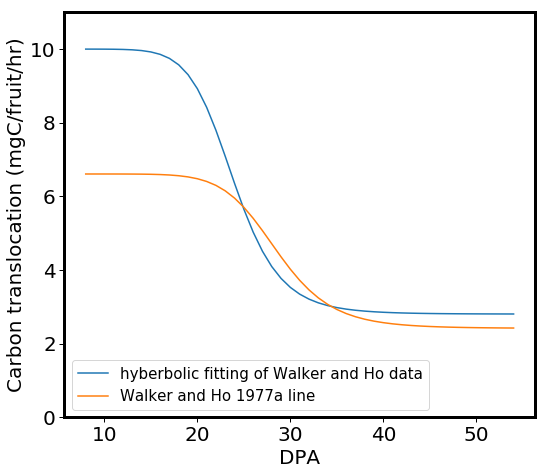

In [16]:
xlist = list()
ylist = list()
ylist2= list()
for i in range(8,55):
    xlist.append(i)
    ylist.append(hyperbol_fitting2(Avolume_Ccont_fitting(i,*popt5),*popt4))
    ylist2.append(line_fitting(Avolume_Ccont_fitting(i,*popt5),*popt2))


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

ax1 = plt.subplot(1,1,1)
ax1.plot(xlist,ylist,"-",label="hyberbolic fitting of Walker and Ho data")
#ax1.plot(xlist,ylist2,"-",label="estimate based on linear fitting of Walker and Ho data")
#ax1.plot(xlist,ylist,"-",label="new constraint")
ax1.plot(xlist,ylist2,"-",label="Walker and Ho 1977a line")
ax1.set_xlabel("DPA")
plt.ylabel("Carbon translocation (mgC/fruit/hr)")
ax1.set_ylim(0,11)

plt.legend(fontsize="15",loc="best")
plt.tight_layout()
plt.show()
